In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import time
import numpy as np
import seaborn as sb
from matplotlib import pyplot
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")


In [13]:
filename = '/content/gdrive/My Drive/data_ml/baseline_all.csv'
start_time = time.time()
df = pd.read_csv(filename)
print(time.time() - start_time)
del start_time
df.shape

0.3487889766693115


(193293, 7)

In [5]:
df.head()

,unique_id,last_activity_date,last_activity_days,count_lots,win,lose,y
0,39273420,2018-11-15,0,18014,7380,10634,1
1,32490244,2018-11-05,0,17719,10287,7432,1
2,25394112,2018-11-20,0,16467,5787,10680,1
3,40473930,2018-07-25,37,10626,6292,4334,1
4,41449359,2018-11-23,0,8572,5079,3493,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193293 entries, 0 to 193292
Data columns (total 7 columns):
unique_id             193293 non-null object
last_activity_date    193293 non-null object
last_activity_days    193293 non-null int64
count_lots            193293 non-null int64
win                   193293 non-null int64
lose                  193293 non-null int64
y                     193293 non-null int64
dtypes: int64(5), object(2)
memory usage: 10.3+ MB


In [14]:
df = df.drop(['last_activity_date'], axis=1)
df.head()

,unique_id,last_activity_days,count_lots,win,lose,y
0,39273420,0,18014,7380,10634,1
1,32490244,0,17719,10287,7432,1
2,25394112,0,16467,5787,10680,1
3,40473930,37,10626,6292,4334,1
4,41449359,0,8572,5079,3493,1


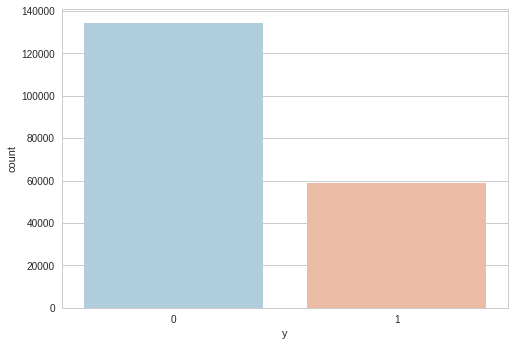

In [8]:
sb.set_style('whitegrid')
sb.countplot(x='y', data=df, palette='RdBu_r')

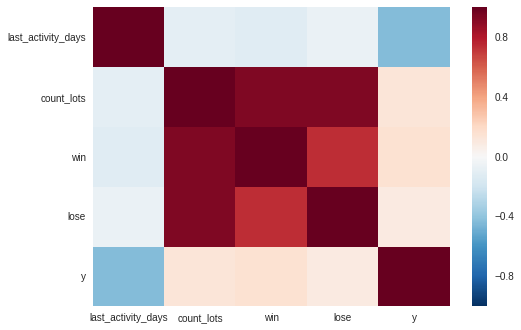

In [9]:
corr = df.corr()
sb.heatmap(corr)

In [16]:
df_1 = df[(df['count_lots'] != 1) | (df['last_activity_days'] < 90)]
df_1.shape

(138598, 6)

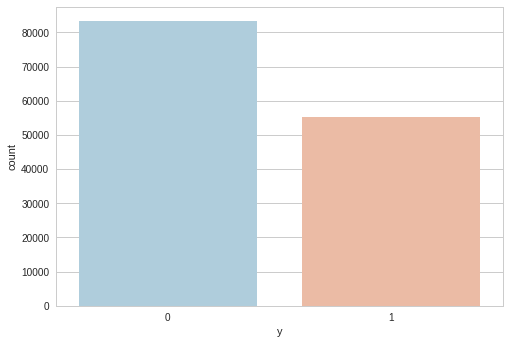

In [20]:
sb.set_style('whitegrid')
sb.countplot(x='y', data=df_1, palette='RdBu_r')

In [17]:
df_2 = df_1.drop(['win', 'lose', 'unique_id'], axis=1)
df_2.head()

,last_activity_days,count_lots,y
0,0,18014,1
1,0,17719,1
2,0,16467,1
3,37,10626,1
4,0,8572,1


In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138598 entries, 0 to 193291
Data columns (total 3 columns):
last_activity_days    138598 non-null int64
count_lots            138598 non-null int64
y                     138598 non-null int64
dtypes: int64(3)
memory usage: 4.2 MB


In [19]:
df_2.describe()

,last_activity_days,count_lots,y
count,138598.000000,138598.000000,138598.000000
mean,164.971926,20.183430,0.398981
std,186.256737,122.351543,0.489691
min,0.000000,1.000000,0.000000
25%,22.000000,2.000000,0.000000
50%,87.000000,5.000000,0.000000
75%,254.000000,14.000000,1.000000
max,3959.000000,18014.000000,1.000000


In [0]:
df_3 = df_2[df_2['count_lots'] < 2500]

In [0]:
df_4 = df_3[df_3['last_activity_days'] < 500]

In [98]:
df_4 = df_4.sample(n=2000)
df_4.shape

ValueError: ignored

In [0]:
labels = df_4['y']

In [0]:
def printplot(labels):
    colors = cm.nipy_spectral(labels.astype(float) / 2)
    pyplot.xlabel('last_activity_days')
    pyplot.ylabel('count_lots')
    pyplot.scatter(df_4.iloc[:, 0], df_4.iloc[:, 1], c=colors)

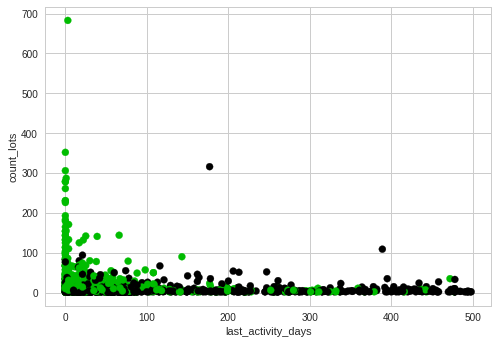

In [26]:
printplot(labels)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['y', 'unique_id'],axis=1), 
                                                    df['y'], test_size=0.20, 
                                                    random_state=101)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtc = DecisionTreeClassifier(max_depth=3) #max_depth=5 -- optimal

In [0]:
dtc = dtc.fit(X_train, y_train)

In [0]:
pred = dtc.predict(X_test)

In [95]:
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix
print(cohen_kappa_score(y_test, pred))
f1_score(y_test, pred)

0.49937165248592963


0.6223978118826926

In [96]:
print(confusion_matrix(y_test, pred))

[[25060  1813]
 [ 5642  6144]]


In [0]:
from sklearn.tree import export_graphviz

In [0]:
with open("/content/gdrive/My Drive/data_ml/tree_classifier.dot", "w") as f:
    f = export_graphviz(dtc, out_file=f)